In [14]:
import pandas as pd

df_train = pd.read_csv("data/smote/dataframe_train.csv")
df_test = pd.read_csv("data/smote/dataframe_test.csv")

In [15]:
df_train.head()

,Montant,CodeDecision,VerifianceCPT1,VerifianceCPT2,VerifianceCPT3,D2CB,ScoringFP1,TauxImpNb_RB,EcartNumCheq,NbrMagasin3J,...,CA3TRetMtt,CA3TR,Heure,Jour,Mois,Année,Heure2,Minute,Seconde,FlagImpaye
0,20.00,1,0.0,0.0,0.0,551.0,0.0,0.0,0.0,1.0,...,20.0,0.0,27134,1,2,2017,7,32,14,0
1,57.64,1,0.0,0.0,0.0,549.0,0.0,0.0,0.0,1.0,...,40.0,0.0,28058,1,2,2017,7,47,38,0
2,54.29,0,1.0,1.0,1.0,267.0,0.0,0.0,0.0,1.0,...,40.0,0.0,28128,1,2,2017,7,48,48,0
3,42.51,1,0.0,0.0,0.0,523.0,0.0,0.0,0.0,1.0,...,40.0,0.0,29633,1,2,2017,8,13,53,0
4,50.84,1,0.0,0.0,0.0,551.0,0.0,0.0,0.0,1.0,...,40.0,0.0,29904,1,2,2017,8,18,24,0


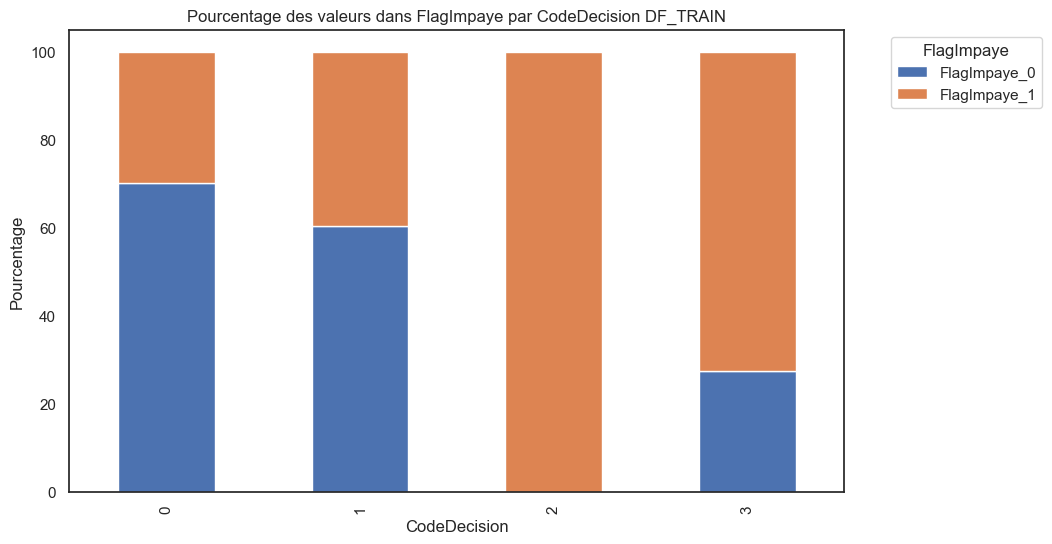

In [16]:
import matplotlib.pyplot as plt

table_correspondance = pd.crosstab(index=df_train['CodeDecision'], columns=df_train['FlagImpaye'], normalize='index') * 100

# Renommez les colonnes pour plus de clarté
table_correspondance.columns = ['FlagImpaye_0', 'FlagImpaye_1']

# Tracez un graphique à barres empilées
table_correspondance.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Pourcentage des valeurs dans FlagImpaye par CodeDecision DF_TRAIN')
plt.xlabel('CodeDecision')
plt.ylabel('Pourcentage')
plt.legend(title='FlagImpaye', bbox_to_anchor=(1.05, 1), loc='upper left')

# Affichez le graphique
plt.show()

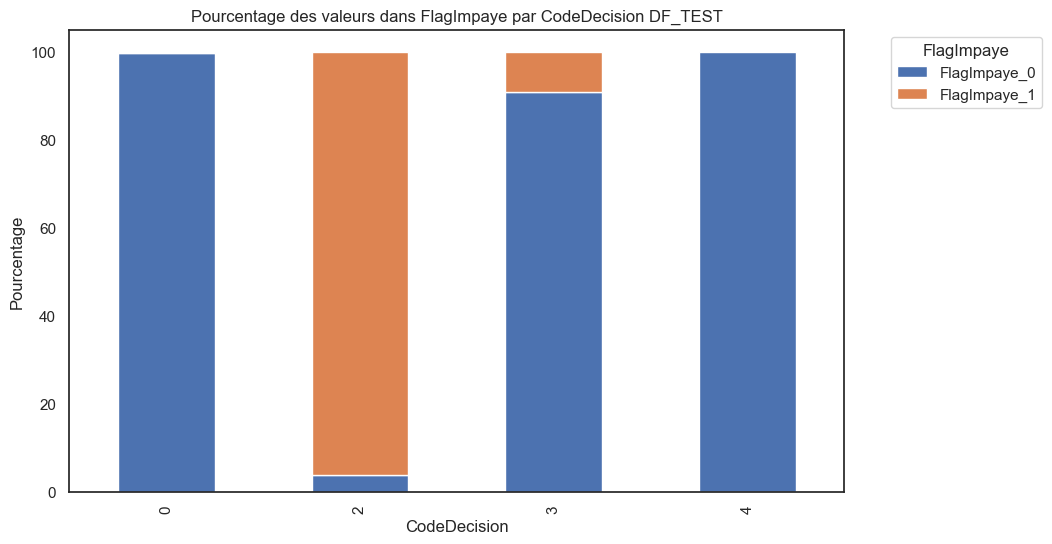

In [17]:

table_correspondance = pd.crosstab(index=df_test['CodeDecision'], columns=df_test['FlagImpaye'], normalize='index') * 100

# Renommez les colonnes pour plus de clarté
table_correspondance.columns = ['FlagImpaye_0', 'FlagImpaye_1']

# Tracez un graphique à barres empilées
table_correspondance.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Pourcentage des valeurs dans FlagImpaye par CodeDecision DF_TEST')
plt.xlabel('CodeDecision')
plt.ylabel('Pourcentage')
plt.legend(title='FlagImpaye', bbox_to_anchor=(1.05, 1), loc='upper left')

# Affichez le graphique
plt.show()

In [18]:
# Code 0 Honnete
# Code 1 Honnete
# Code 2 FRAUDEUR
# Code 3 FRAUDEUR à 40%
# Code 4 que un seul dans toutes les données => inutile

<Axes: >

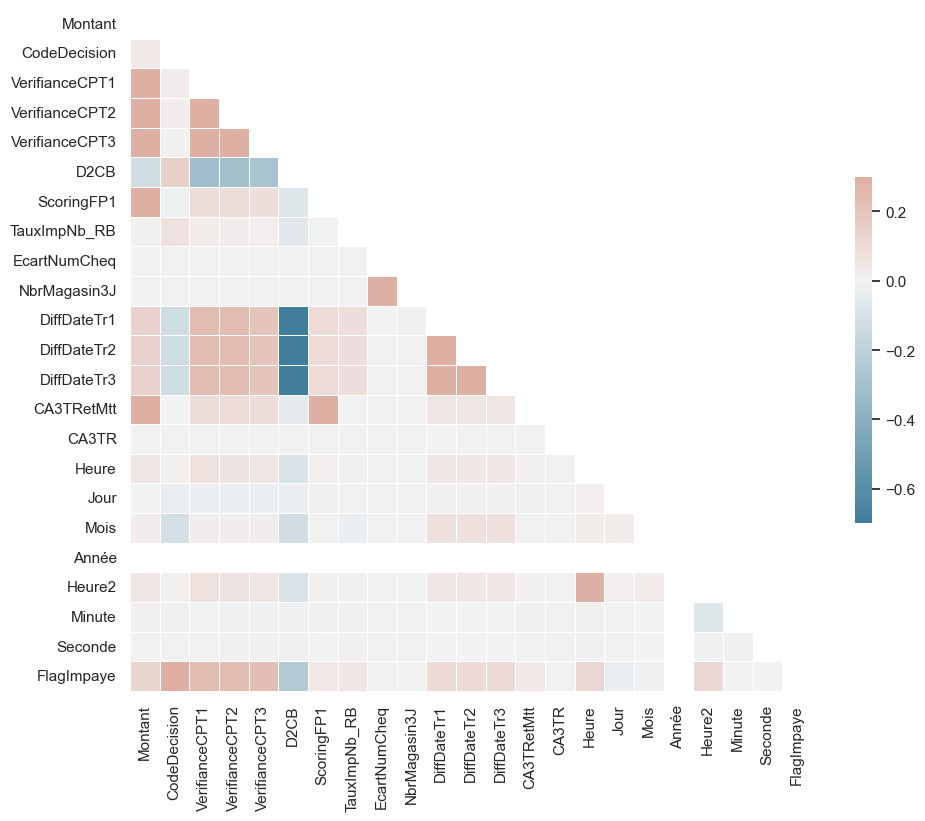

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

# Compute the correlation matrix
corr = df_train.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [20]:
most_correlated_features = corr['CodeDecision'].abs().sort_values(ascending=False).index[1:]
print(most_correlated_features)
most_correlated_features = most_correlated_features[1:] # on enleve variable Flag Impaye
print(most_correlated_features)

Index(['FlagImpaye', 'D2CB', 'DiffDateTr3', 'DiffDateTr2', 'DiffDateTr1',
       'Mois', 'TauxImpNb_RB', 'Montant', 'Jour', 'VerifianceCPT1',
       'VerifianceCPT2', 'ScoringFP1', 'Heure', 'Heure2', 'VerifianceCPT3',
       'CA3TRetMtt', 'Minute', 'Seconde', 'CA3TR', 'EcartNumCheq',
       'NbrMagasin3J', 'Année'],
      dtype='object')
Index(['D2CB', 'DiffDateTr3', 'DiffDateTr2', 'DiffDateTr1', 'Mois',
       'TauxImpNb_RB', 'Montant', 'Jour', 'VerifianceCPT1', 'VerifianceCPT2',
       'ScoringFP1', 'Heure', 'Heure2', 'VerifianceCPT3', 'CA3TRetMtt',
       'Minute', 'Seconde', 'CA3TR', 'EcartNumCheq', 'NbrMagasin3J', 'Année'],
      dtype='object')


In [21]:
from sklearn.cluster import KMeans
import pickle as pckl

X_train = df_train[most_correlated_features]

# Clustering avec K-means
n_clusters = 4  # Vous pouvez ajuster le nombre de clusters en fonction de votre problème
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df_train['Cluster_Code_Decision'] = kmeans.fit_predict(X_train)


# Sauvegarde du modèle
model_name = "kmeans"
filename = 'models/classif_code/' + model_name + '.pkl'
with open(filename, 'wb') as file:
    pckl.dump(kmeans, file)

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [22]:
df_train.head()

,Montant,CodeDecision,VerifianceCPT1,VerifianceCPT2,VerifianceCPT3,D2CB,ScoringFP1,TauxImpNb_RB,EcartNumCheq,NbrMagasin3J,...,CA3TR,Heure,Jour,Mois,Année,Heure2,Minute,Seconde,FlagImpaye,Cluster_Code_Decision
0,20.00,1,0.0,0.0,0.0,551.0,0.0,0.0,0.0,1.0,...,0.0,27134,1,2,2017,7,32,14,0,2
1,57.64,1,0.0,0.0,0.0,549.0,0.0,0.0,0.0,1.0,...,0.0,28058,1,2,2017,7,47,38,0,2
2,54.29,0,1.0,1.0,1.0,267.0,0.0,0.0,0.0,1.0,...,0.0,28128,1,2,2017,7,48,48,0,2
3,42.51,1,0.0,0.0,0.0,523.0,0.0,0.0,0.0,1.0,...,0.0,29633,1,2,2017,8,13,53,0,2
4,50.84,1,0.0,0.0,0.0,551.0,0.0,0.0,0.0,1.0,...,0.0,29904,1,2,2017,8,18,24,0,2


In [23]:
X_test = df_test[most_correlated_features]
df_test['Cluster_Code_Decision'] = kmeans.predict(X_test)


# Attribution de CodeDecision basée sur les statistiques descriptives
cluster_code_decision_mapping = df_train.groupby('Cluster_Code_Decision')['CodeDecision'].agg(lambda x: x.value_counts().idxmax()).to_dict()
df_test['CodeDecision'] = df_test['Cluster_Code_Decision'].map(cluster_code_decision_mapping)

# Affichage des résultats
print(df_test[['Cluster_Code_Decision', 'CodeDecision']])

        Cluster_Code_Decision  CodeDecision
0                           2             0
1                           2             0
2                           2             0
3                           2             0
4                           2             0
...                       ...           ...
663655                      1             0
663656                      1             0
663657                      1             0
663658                      1             0
663659                      1             0

[663660 rows x 2 columns]


In [24]:
# Table croisée entre Cluster, CodeDecision, et FlagImpaye pour les données test
res = pd.crosstab(index=[df_train['Cluster_Code_Decision'], df_train['CodeDecision']], columns=df_train['FlagImpaye'], margins=True, margins_name='Total')
print(res)

FlagImpaye                                0        1    Total
Cluster_Code_Decision CodeDecision                           
0                     0              511381   218308   729689
                      1              182002   126776   308778
                      2                  81   355718   355799
                      3                 166      263      429
1                     0              649761   339540   989301
                      1              160822   195100   355922
                      2                 158   517190   517348
                      3                 245      943     1188
2                     0              597046   179009   776055
                      1              334058   115298   449356
                      2                 125   356162   356287
                      3                  97      219      316
3                     0              687656   308121   995777
                      1              262213   179634   441847
        

In [25]:
df_train.to_csv('data//classif/dataframe_train.csv',index=False)
df_test.to_csv('data/classif/dataframe_test.csv',index=False)